#### 1) Apply f_classif from sklearn to assess the discriminative power of the input variables. Identify the input variable with the highest and lowest discriminative power. Plot the class-conditional probability density functions of these two input variables.

The  input variable with the highest descriminitive power is degree_spondylolisthesis and with the lowest is pelvic_radius


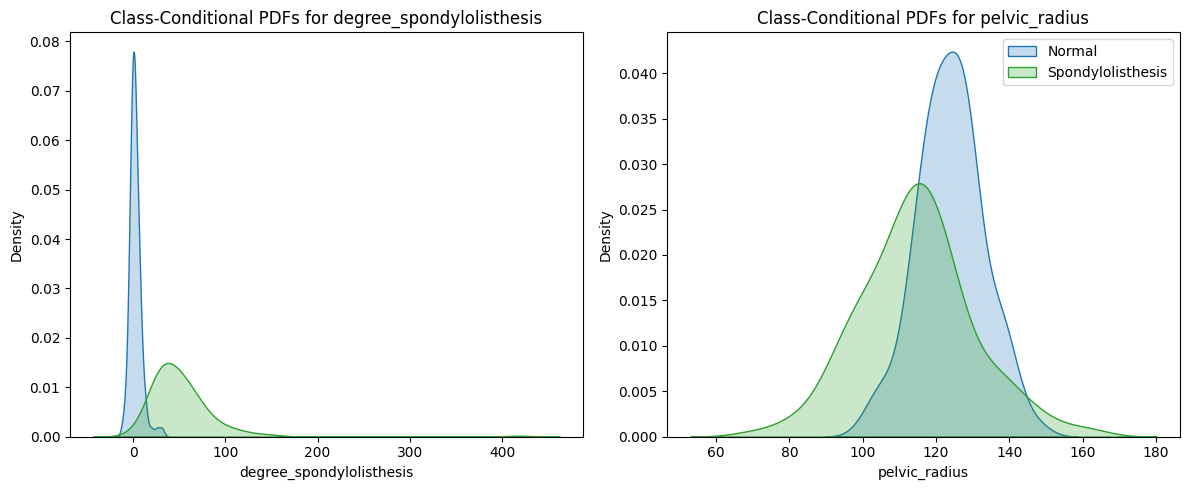

In [3]:
#Remove warnings to enhance readability
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.feature_selection import f_classif

# Load the data
data = arff.loadarff('../data/column_diagnosis.arff')
# Convert the ARFF data to a Pandas DataFrame
df = pd.DataFrame(data[0])

X = df.drop('class', axis=1)
y = df['class']

(array_1, array_2) = f_classif(X, y)

highest_idx = np.argmax(array_1)       #degree_spondylolisthesis
lowest_idx = np.argmin(array_1)        #pelvic_radius

plt.figure(figsize=(12, 5))

print(f"The  input variable with the highest descriminitive power is {X.columns[highest_idx]} \
      and with the lowest is {X.columns[lowest_idx]}")

plt.subplot(1, 2, 1)
sns.kdeplot(df[df['class'] == b'Normal']["degree_spondylolisthesis"], label='Normal', fill=True)
sns.kdeplot(df[df['class'] == b'DiskHernia']["degree_spondylolisthesis"], label='Disk Hernia', fill=True)
sns.kdeplot(df[df['class'] == b'Spondylolisthesis']["degree_spondylolisthesis"], label='Spondylolisthesis', fill=True)
plt.xlabel("degree_spondylolisthesis")
plt.ylabel('Density')
plt.title(f'Class-Conditional PDFs for {"degree_spondylolisthesis"}')
plt.subplot(1, 2, 2)
sns.kdeplot(df[df['class'] == b'Normal']["pelvic_radius"], label='Normal', fill=True)
sns.kdeplot(df[df['class'] == b'DiskHernia']["pelvic_radius"], label='Disk Hernia', fill=True)
sns.kdeplot(df[df['class'] == b'Spondylolisthesis']["pelvic_radius"], label='Spondylolisthesis', fill=True)
plt.xlabel("pelvic_radius")
plt.ylabel('Density')
plt.title(f'Class-Conditional PDFs for {"pelvic_radius"}')

plt.tight_layout()
plt.legend()
plt.show()

#### 2) Using a stratified 70-30 training-testing split with a fixed seed (random_state=0), assess in a single plot both the training and testing accuracies of a decision tree with depth limits in {1,2,3,4,5,6,8,10} and the remaining parameters as default.

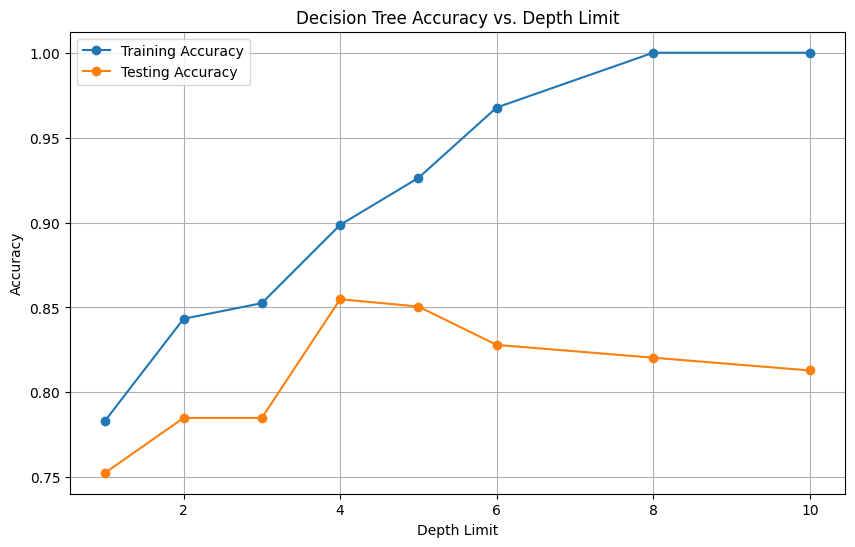

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data
data = arff.loadarff('../data/column_diagnosis.arff')
# Convert the ARFF data to a Pandas DataFrame
df = pd.DataFrame(data[0])

X = df.drop('class', axis=1)
y = df['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print()

train_accuracies = []
test_accuracies = []
depths = [1, 2, 3, 4, 5, 6, 8, 10]

for depth in depths:
    train_scores = []
    test_scores = []

    # Run 10 times to get a better accuracy
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=y, random_state=0)
        # Create and fit the decision tree classifier

        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_train, y_train)
        
        # Calculate and store training and testing accuracies
        train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
        test_scores.append(accuracy_score(y_test, clf.predict(X_test)))
    
    # Calculate the average accuracy over 10 runs
    avg_train_accuracy = np.mean(train_scores)
    avg_test_accuracy = np.mean(test_scores)
    
    train_accuracies.append(avg_train_accuracy)
    test_accuracies.append(avg_test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Decision Tree Accuracy vs. Depth Limit')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()



#### 3) Comment on the results, including the generalization capacity across settings.

<div style={width: 500px, color: "red"}>

**Trees with low depth are underfitting, meaning they don't yet fit the training data very well, which results in low accuracy on both testing and training. On the other hand, trees with high depth tend to overfit, implying that they are adjusting too much to the training data causing a better training accuracy but worst testing accuracy. 
The best depth is 5, which is the best trade-off between underfitting and overfitting.**

</div>



#### 4) To deploy the predictor, a healthcare team opted to learn a single decision tree (random_state=0) using all available data as training data, and further ensuring that each leaf has a minimum of 20 individuals in order to avoid overfitting risks.

> i. Plot the decision tree.

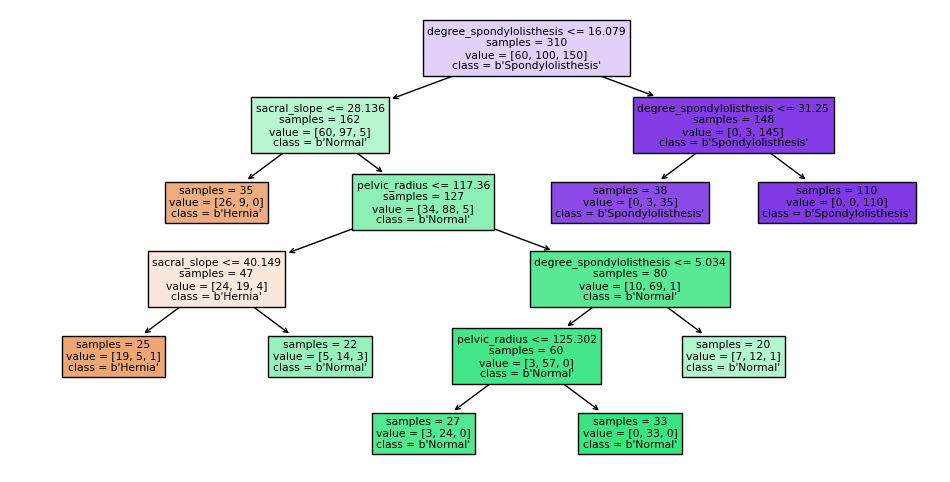

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import arff
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load the data
data = arff.loadarff('../data/column_diagnosis.arff')
# Convert the ARFF data to a Pandas DataFrame
df = pd.DataFrame(data[0])

X = df.drop('class', axis=1)
y = df['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

predictor = DecisionTreeClassifier(random_state=0, min_samples_leaf=20)
predictor.fit(X, y_encoded)

# Convert feature names and class names to plain strings
feature_names = [str(feature) for feature in X.columns]
class_names = [str(class_name) for class_name in label_encoder.classes_]

# Plot classifier
plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=feature_names, class_names=class_names, impurity=False, filled=True)
plt.show()


> ii. Characterize a hernia condition by identifying the hernia-conditional associations.

**Degree spondelolisthesis <= 16.079 and (<br>
        ( sacral_slope <= 28.136 )<br>
    or               
        ( pelvic_radius <= 117.36 & sacral_slope <= 40.149 )<br>
    )**